In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [2]:
# Define the test function
def Rastrigin(x):
    ras = 20 + x[:,0] ** 2 + x[:,1] ** 2 - 10 * (np.cos(2*np.pi*x[:,0]) + np.cos(2*np.pi*x[:,1]))
    return ras

In [3]:
gy_size = 50 # Size of the employed bee colonies
gc_size = 30 # Size of the onlooker bee colonies
dim = 2 # Dimension
limit = round(0.2 * dim * gy_size) # food source experimental limits and determine the scout bee stage
max_gen = 50 # Maximum number of iterations
pop_max = 5 # food source boundary, food source = location
pop_min = -5 # # food source boundary, food source = location
x_max = np.ones([1,dim]) * 5
x_min = np.ones([1,dim]) * -5
record = []
generation = 1

In [4]:
# Initializing the population
pop = np.zeros([gy_size,dim + 1])
for i in range(gy_size): # Initialize the population. The initial population is a employed bee role.
    for j in range(dim):
        pop[i,j] = x_min[0,j]+(x_max[0,j]-x_min[0,j])*random.random()
pop[:,dim] = Rastrigin(pop[:, 0:dim]) # Calculate the corresponding function value

idx_min = int(np.argwhere(pop[:,dim] == min(pop[:,dim])))# Minimum function value and its index
minvalue = min(pop[:,dim])
best_pop = pop[idx_min,:] # The best food source
L = np.zeros(gy_size) # Number of times the food source location updates stalled

In [5]:
for gen in range(max_gen):
    
    # Employed bee stage
    for i in range(gy_size):
        k = random.sample(range(gy_size),1) # Select an individual other than individual i
        while k==i:
            k = random.sample(range(gy_size),1)
            break

        new_pop = np.zeros([1,dim + 1])
        fai = random.random() * 2 - 1 # Acceleration factor, the range of values [-1,1]
        new_pop[:,0:dim] = pop[i,0:dim] + fai * (pop[i,0:dim] - pop[k,0:dim]) # Update the location of the employed bees

        # Boundary processing
        for j in range(dim):
            new_pop[:,j] = min(pop_max,new_pop[:,j])
            new_pop[:,j] = max(pop_min,new_pop[:,j])

        new_pop[:,dim] = Rastrigin(new_pop[:, 0:dim]) # Update the corresponding function value

        if new_pop[:,dim]<pop[i,dim]: # Greedy way to store the best food source, if not updated, then record
            pop[i,:] = new_pop
        else:
            L[i] = L[i] + 1 # Record the number of update stops for this food source

    # Calculating the cumulative probability
    meanvalue = np.mean(pop[:,dim])
    F = np.zeros(gy_size)
    for i in range(gy_size):
        F[i] = np.exp(-pop[i,dim]/meanvalue)

    P = np.cumsum(F/sum(F)) # Update cumulative selection probability
    
    # onlooker bee stage
    for i in range(gc_size):
        r = random.random() # A roulette wheel algorithm is used to select a food source, update the source
        for m in range(gy_size):
            if r <= P[m]:
                j = np.argwhere(P == P[m])

        k = random.sample(range(gy_size),1) # Select an individual other than individual j
        while k==j:
            k = random.sample(range(gy_size),1)
            break

        fai = random.random() * 2 - 1 # Acceleration factor, the range of values [-1,1]
        new_pop[:,0:dim] = pop[j,0:dim] + fai * (pop[j,0:dim] - pop[k,0:dim]) # # Update the location of the onlooker bees
        
        # Boundary processing
        for n in range(dim):
            new_pop[:,n] = min(pop_max,new_pop[:,n])
            new_pop[:,n] = max(pop_min,new_pop[:,n])

        new_pop[:,dim] = Rastrigin(new_pop[:, 0:dim]) # Update cumulative selection probability

        if new_pop[:,dim]<pop[j,dim]: # Greedy way to store the best food source, if not updated, then record
            pop[j,:] = new_pop
        else:
            L[i] = L[i] + 1 # Record the number of update stops for this food source
            
    # scout bees stage
    for i in range(gy_size): # Traverse the population to see if any food sources have stalled their renewal.
        if L[i] >= limit:
            rand = np.zeros(dim)
            for i in range(dim):
                rand[i] = random.random()
            pop[i,0:dim] = (pop_max-pop_min) * rand + pop_min
            L[i] = 0

    pop[:,dim] = Rastrigin(pop[:, 0:dim])
    
    # Completing a generation of updates
    for i in range(gy_size):
        if pop[i,dim] < minvalue:
            best_pop = pop[i,0:dim]
            pop[:,dim] = Rastrigin(pop[:, 0:dim])
            minvalue = pop[i,dim]
            idx_min = i
            
    record.append([generation,idx_min,minvalue])
    generation = generation + 1
    
record = np.array(record).reshape(-1,3)

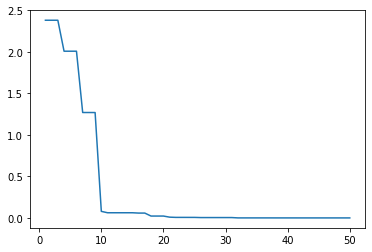

In [6]:
plt.plot(record[:,0],record[:,2])